In [89]:
from keras.applications import VGG16
from src.vis import utils
from src.vis.utils import utils
from keras import activations
from keras.models import model_from_json
from src.models.model_manager import get_optimizer
from matplotlib import pyplot as plt



json_file = open('D:\Work\AITeam\multiclass_keras\models/model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# convert json to keras model file
model = model_from_json(loaded_model_json)
#load woeights into new model
model.load_weights("D:\Work\AITeam\multiclass_keras\models/model.h5")
model.compile(loss='categorical_crossentropy', optimizer=get_optimizer())

print(model.summary())
layer_idx = utils.find_layer_idx(model, 'Dense_14')
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Convolution2D_236 (Conv2D)      (None, 112, 112, 32) 896         Input_1[0][0]                    
__________________________________________________________________________________________________
Convolution2D_235 (Conv2D)      (None, 112, 112, 32) 9248        Convolution2D_236[0][0]          
__________________________________________________________________________________________________
Convolution2D_237 (Conv2D)      (None, 110, 110, 64) 18496       Convolution2D_235[0][0]          
__________________________________________________________________________________________________
MaxPooling

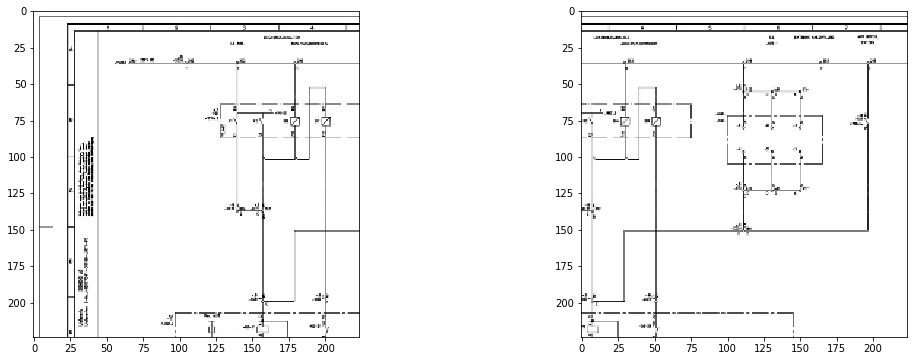

In [14]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)
img1 = utils.load_img('D:/Work\AITeam/multiclass_keras/data/processed/transformed/Etechnik_JPG_Plaene/Etechnik_JPG_Plaene6_0.jpg', target_size=(224, 224))
img2 = utils.load_img('D:/Work\AITeam/multiclass_keras/data/processed/transformed/Etechnik_JPG_Plaene/Etechnik_JPG_Plaene6_1.jpg', target_size=(224, 224))
f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [ ]:
from src.vis.visualization import visualize_activation
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# 20 is the imagenet category for 'ouzel'
for x in range (5):
    img = visualize_activation(model, layer_idx, filter_indices=x)
    print(x)
    plt.figure(x+1)
    plt.imshow(img)

0
1
2
3


In [ ]:
from src.vis.visualization import visualize_saliency, overlay
from src.vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'Dense_2')

f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    # 20 is the imagenet index corresponding to `ouzel`
    grads = visualize_saliency(model, layer_idx, filter_indices=4, seed_input=img)
    
    # visualize grads as heatmap
    ax[i].imshow(grads, cmap='jet')

[[4.2458475e-04 2.9041935e-04 9.1090618e-04 ... 5.9039734e-04
  4.8166100e-04 2.6307983e-04]
 [4.0960754e-04 1.2355934e-04 4.1771049e-04 ... 3.6112798e-04
  4.2117090e-04 3.2054429e-04]
 [4.0986028e-04 3.6267276e-04 1.8953467e-03 ... 4.9533841e-04
  8.4150309e-04 3.7708326e-04]
 ...
 [4.6919525e-04 4.7451371e-04 2.9917103e-03 ... 6.3574917e-06
  4.7173449e-05 3.2607786e-05]
 [2.6626352e-04 1.1022685e-03 3.8217448e-03 ... 8.9197310e-05
  1.1309938e-04 4.1133510e-05]
 [5.3804362e-04 4.2146249e-04 4.2445469e-03 ... 6.8760412e-05
  6.2755418e-05 3.2963409e-05]]
[[1.11605186e-04 1.24663115e-04 2.46459735e-04 ... 9.16347257e-04
  6.89945125e-04 4.09071450e-04]
 [9.23694752e-05 9.18264486e-05 1.86003730e-04 ... 4.25334292e-04
  5.23214112e-04 5.37123124e-04]
 [8.65942275e-04 1.43807626e-03 3.73633765e-03 ... 7.65260716e-04
  1.50910707e-03 6.32958487e-04]
 ...
 [3.63151834e-04 1.18858930e-04 1.92648818e-04 ... 3.34550859e-04
  5.58922358e-04 2.75235448e-04]
 [2.52100261e-04 4.86122764e-04 9.5

<Figure size 1296x432 with 0 Axes>

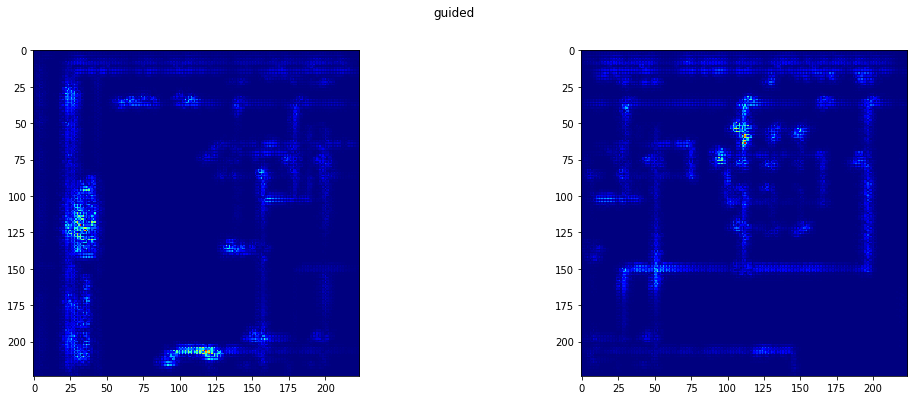

<Figure size 1296x432 with 0 Axes>

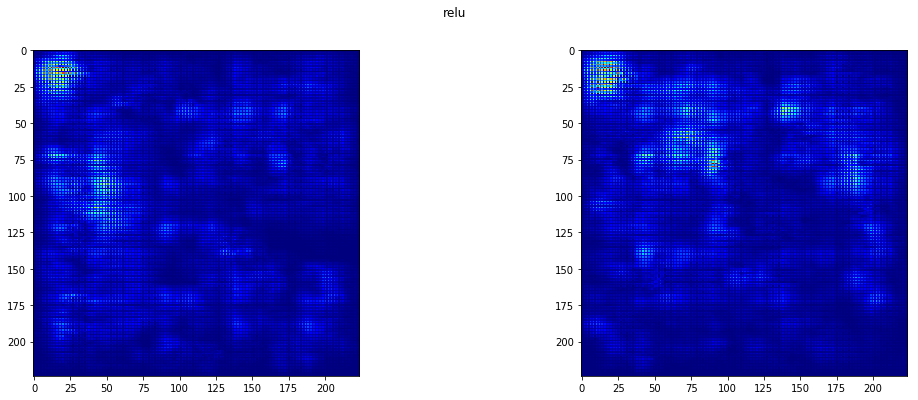

In [23]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=4, 
                                   seed_input=img, backprop_modifier=modifier)
        print(grads)
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet')

[[0.00065531 0.00055162 0.00129749 ... 0.00094392 0.00235599 0.00064192]
 [0.00078726 0.00019458 0.00069326 ... 0.00304554 0.00341762 0.00072938]
 [0.00191003 0.00048352 0.00030974 ... 0.00330758 0.00216873 0.00128931]
 ...
 [0.00022259 0.00024199 0.00171023 ... 0.00102977 0.00095365 0.00015983]
 [0.00015246 0.00047763 0.00040616 ... 0.00182286 0.0030275  0.00059716]
 [0.00015899 0.00016035 0.00051083 ... 0.00042533 0.00091489 0.00012591]]
[[6.5271338e-03 6.4399396e-03 3.5037480e-03 ... 1.3981652e-03
  2.6419209e-03 5.3364073e-04]
 [9.0273004e-03 1.2485685e-03 6.6035911e-03 ... 1.1569690e-03
  2.5614172e-03 7.4591755e-04]
 [4.2365831e-03 6.9612772e-03 1.1545040e-02 ... 3.0178069e-03
  3.2157605e-03 4.8414755e-04]
 ...
 [1.1207751e-03 1.5978763e-04 1.9949439e-03 ... 1.2791584e-02
  1.6015222e-02 2.9504735e-03]
 [5.3982914e-04 1.1078203e-03 2.0567975e-03 ... 9.2115710e-03
  9.4029568e-03 1.6981125e-03]
 [9.5301388e-05 4.1056753e-04 3.8018799e-04 ... 3.5481576e-03
  7.1037468e-03 6.868558

<Figure size 1296x432 with 0 Axes>

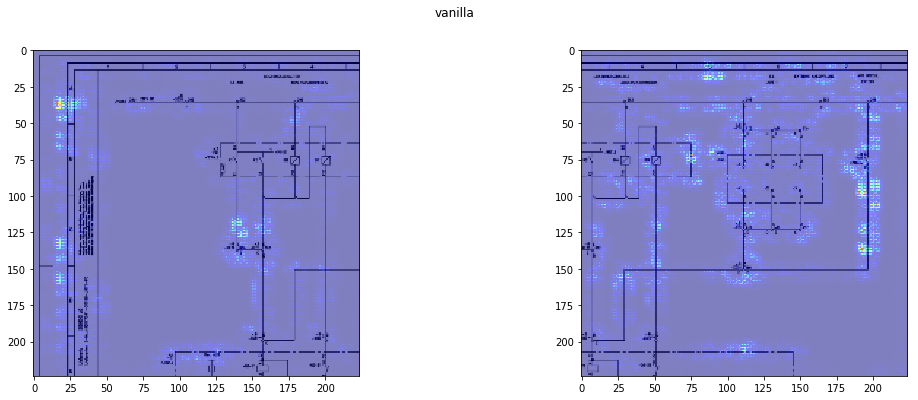

<Figure size 1296x432 with 0 Axes>

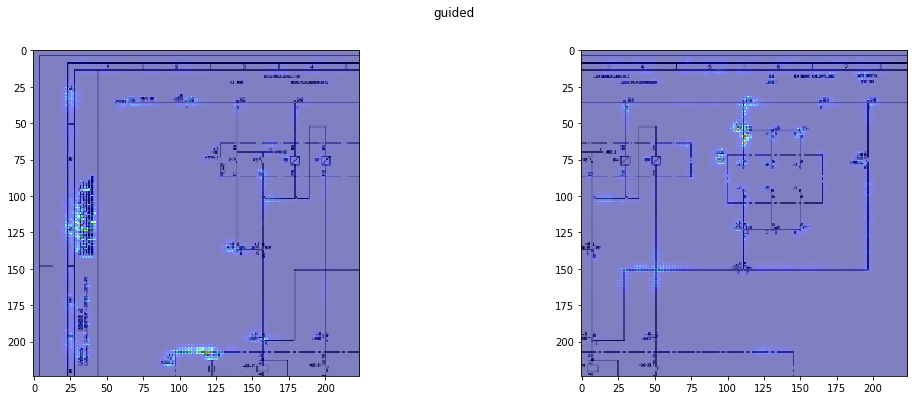

<Figure size 1296x432 with 0 Axes>

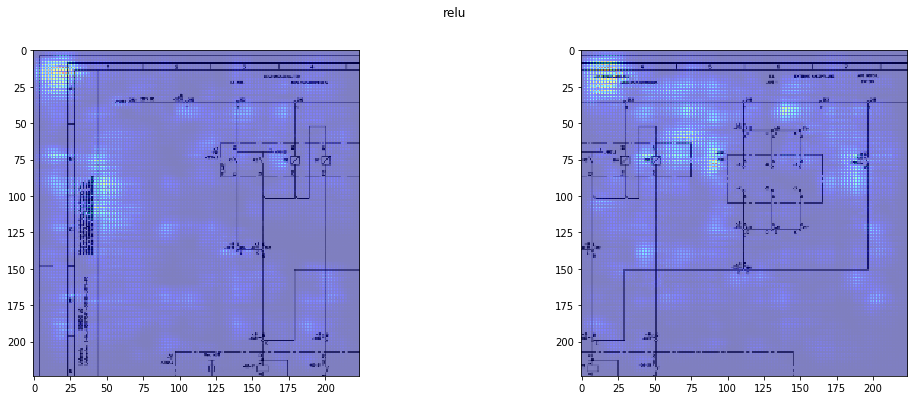

In [42]:
import numpy as np
import matplotlib.cm as cm
from src.vis.visualization import visualize_cam, visualize_saliency

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)

        
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=4, 
                                   seed_input=img, backprop_modifier=modifier)
        print(grads)
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))
    

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Convolution2D_236 (Conv2D)      (None, 112, 112, 32) 896         Input_1[0][0]                    
__________________________________________________________________________________________________
Convolution2D_235 (Conv2D)      (None, 112, 112, 32) 9248        Convolution2D_236[0][0]          
__________________________________________________________________________________________________
Convolution2D_237 (Conv2D)      (None, 110, 110, 64) 18496       Convolution2D_235[0][0]          
__________________________________________________________________________________________________
MaxPooling

KeyboardInterrupt: 

<Figure size 1296x432 with 0 Axes>

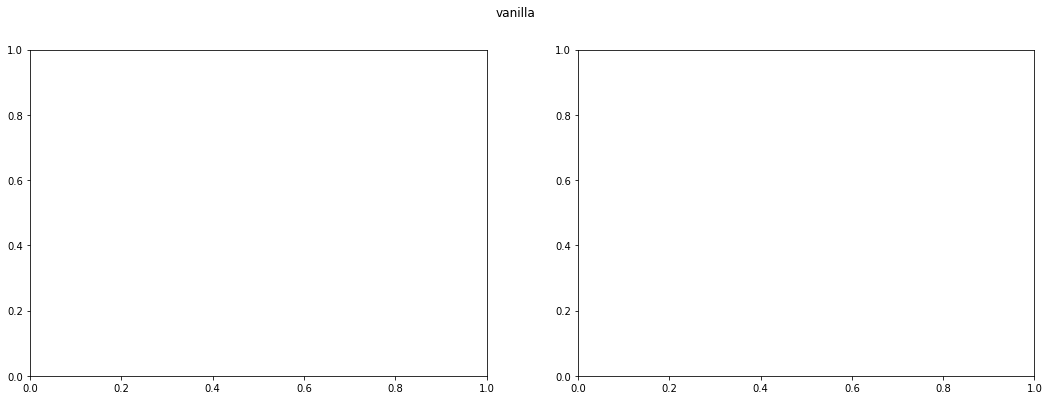

<Figure size 1296x432 with 0 Axes>

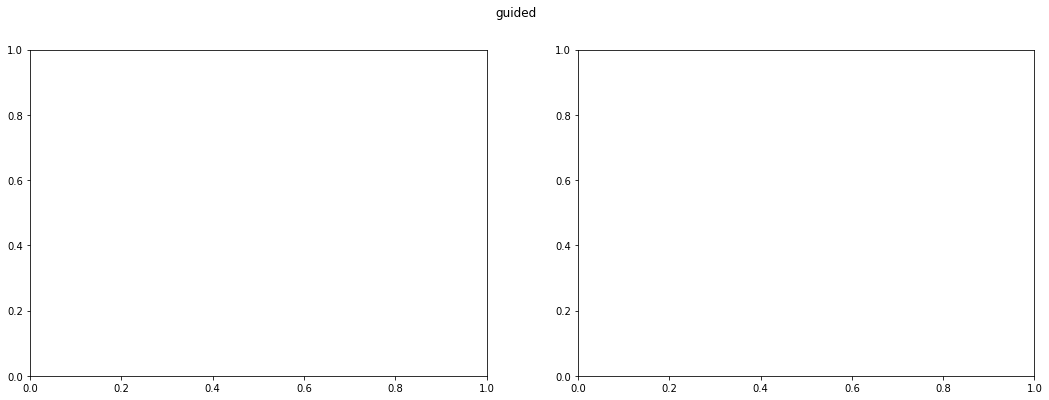

<Figure size 1296x432 with 0 Axes>

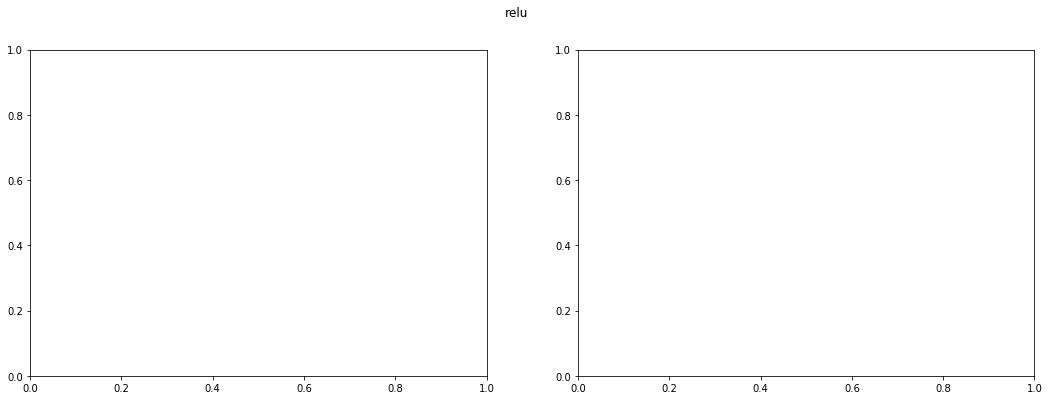

<Figure size 1296x432 with 0 Axes>

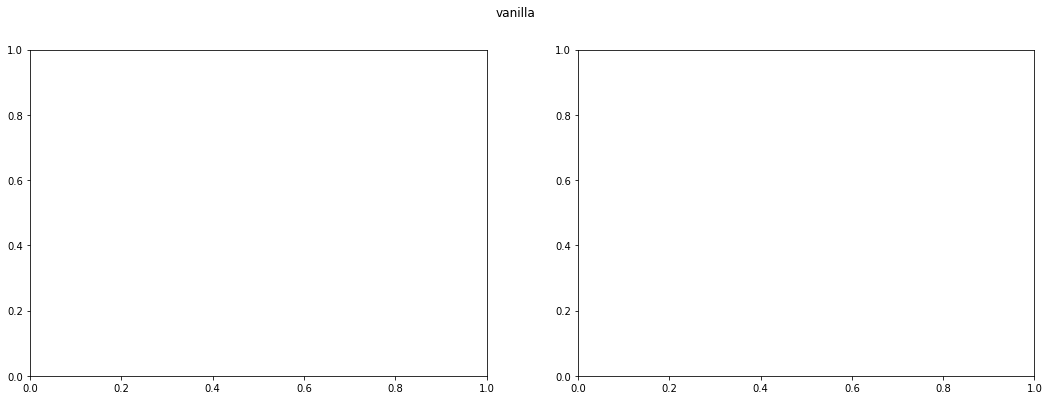

<Figure size 1296x432 with 0 Axes>

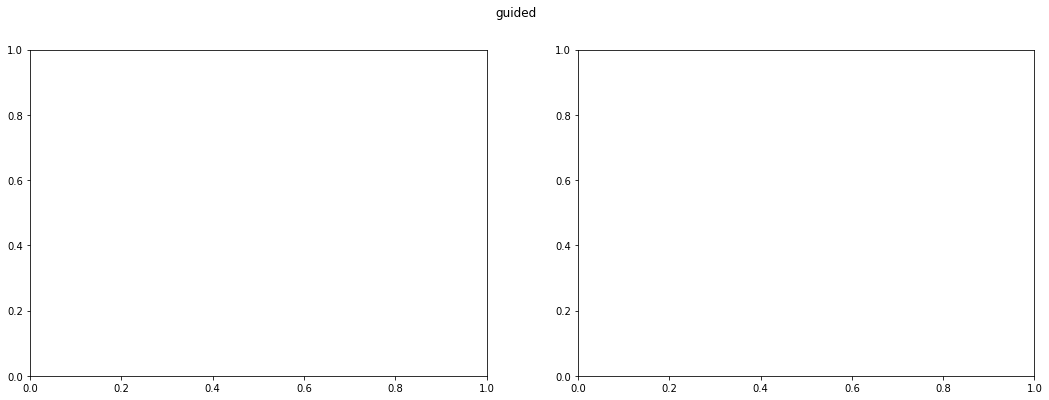

<Figure size 1296x432 with 0 Axes>

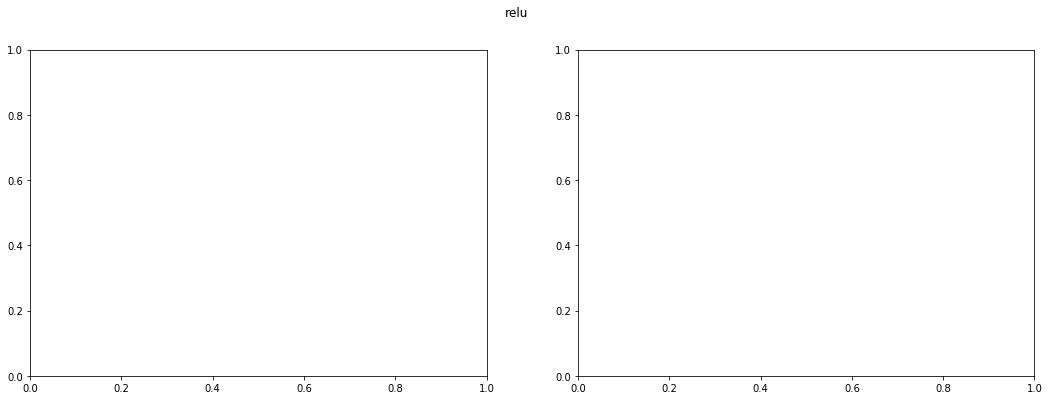

<Figure size 1296x432 with 0 Axes>

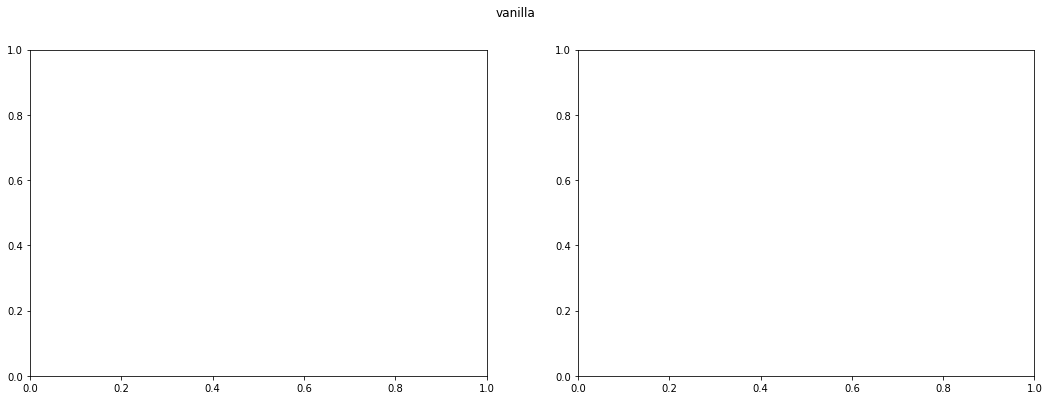

<Figure size 1296x432 with 0 Axes>

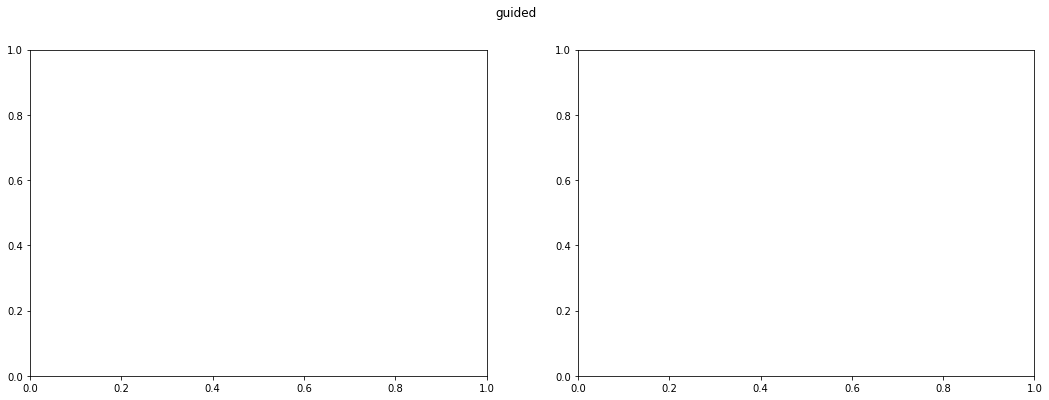

<Figure size 1296x432 with 0 Axes>

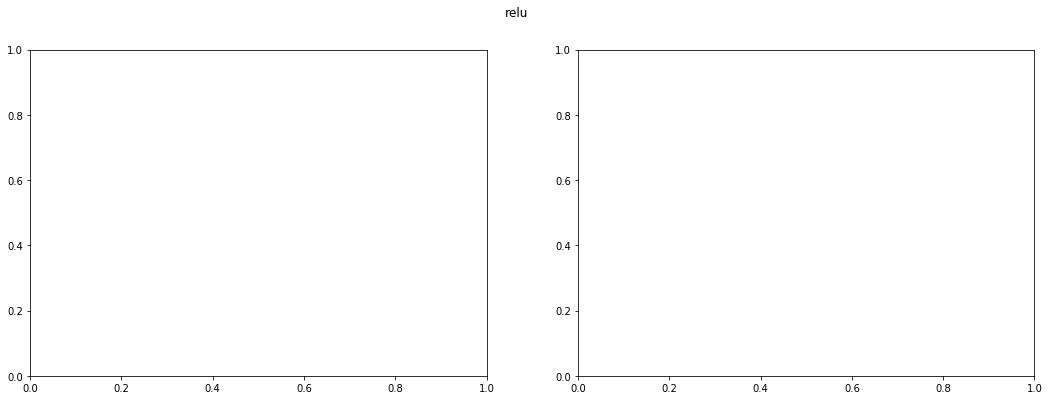

<Figure size 1296x432 with 0 Axes>

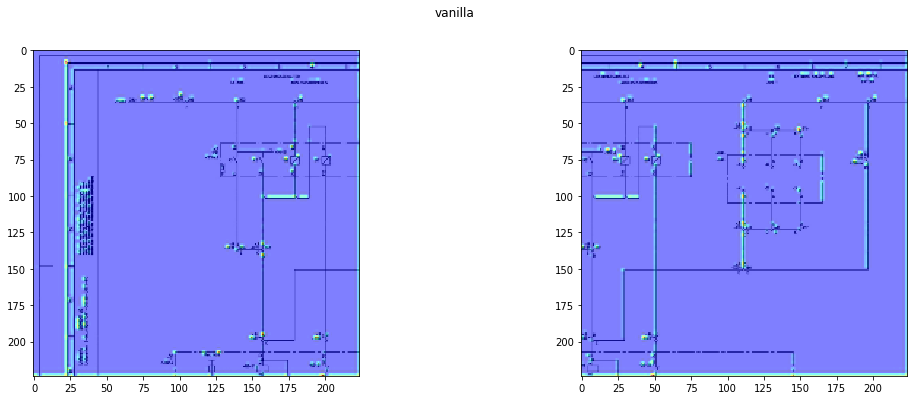

<Figure size 1296x432 with 0 Axes>

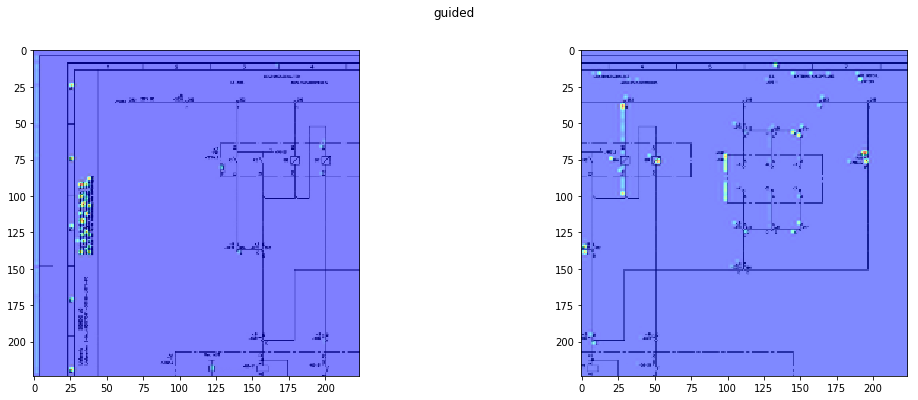

<Figure size 1296x432 with 0 Axes>

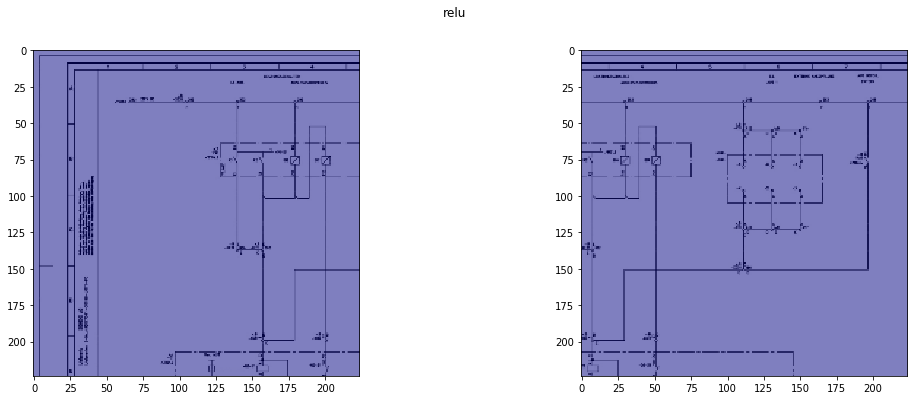

<Figure size 1296x432 with 0 Axes>

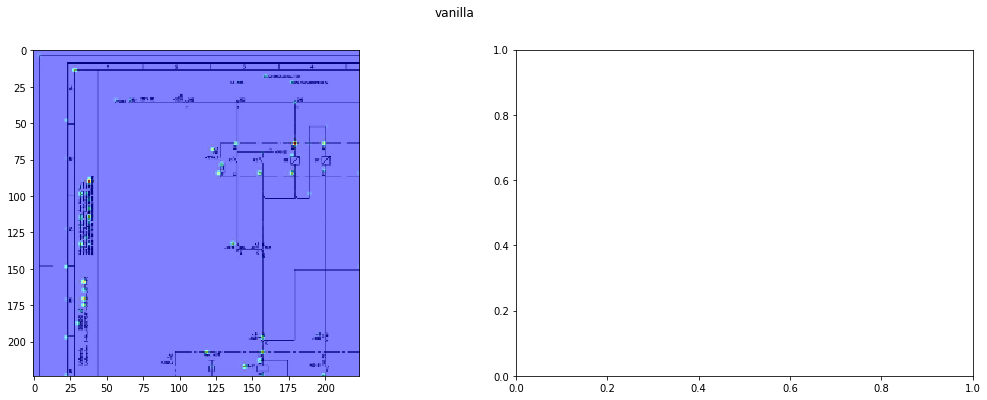

In [76]:
import numpy as np
import matplotlib.cm as cm
from src.vis.visualization import visualize_cam, visualize_saliency
print(model.summary())
print('idx')
layer_idx = utils.find_layer_idx(model, 'Convolution2D_130')
print(layer_idx)
print('idxend')
for x in range (34):
   
        for modifier in [None, 'guided', 'relu']:
            plt.figure()
            f, ax = plt.subplots(1, 2)
            plt.suptitle("vanilla" if modifier is None else modifier)

        

            for i, img in enumerate([img1, img2]):   
                try:
                    l_index = len(model.layers)-1-x
                    print(x)
                    # 20 is the imagenet index corresponding to `ouzel`
                    grads = visualize_cam(model,x , filter_indices=4, 
                                          seed_input=img, backprop_modifier=modifier)  
                    #print('cam')
                    #print(grads)
                    print(x)
                    # Lets overlay the heatmap onto original image.    
                    jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
                    ax[i].imshow(overlay(jet_heatmap, img))
                except ValueError:
                    print('error')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


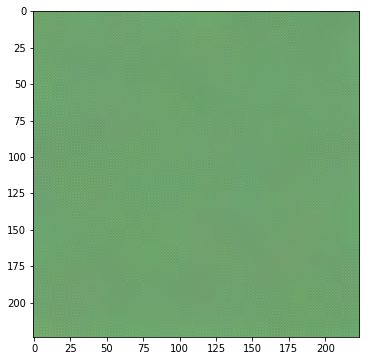

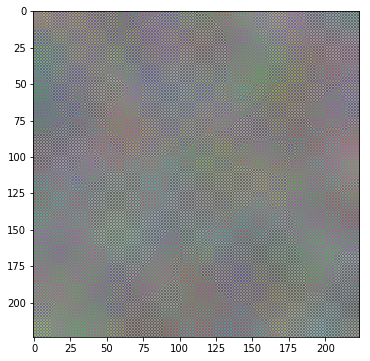

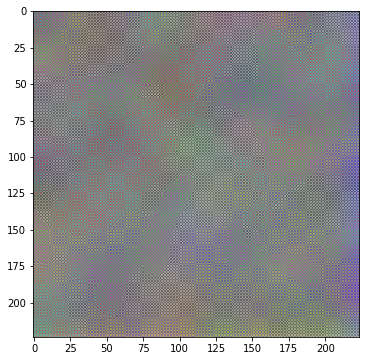

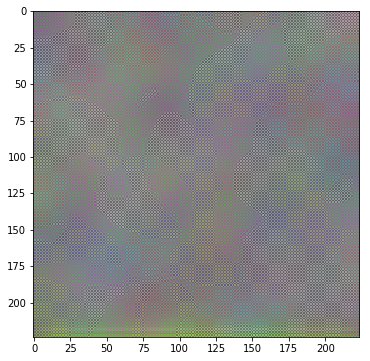

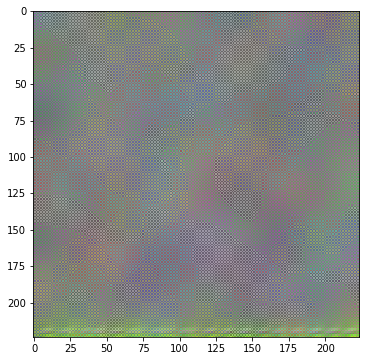

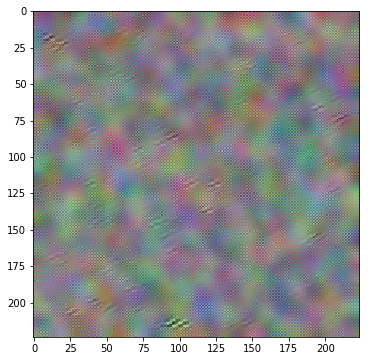

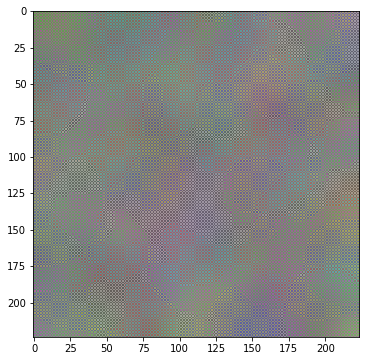

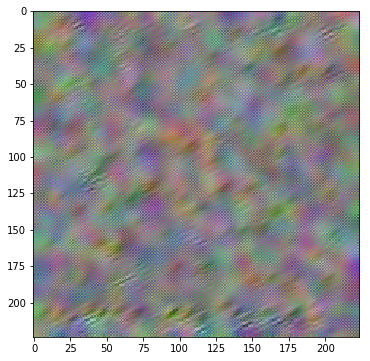

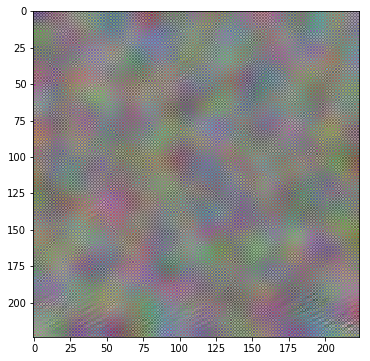

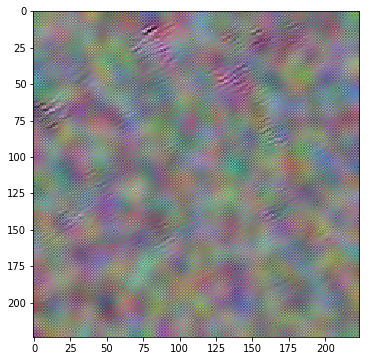

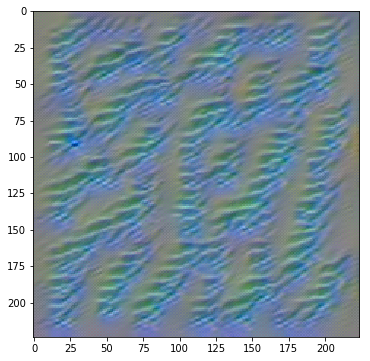

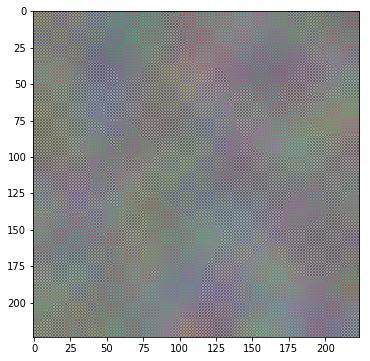

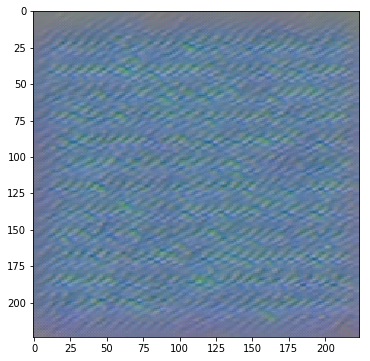

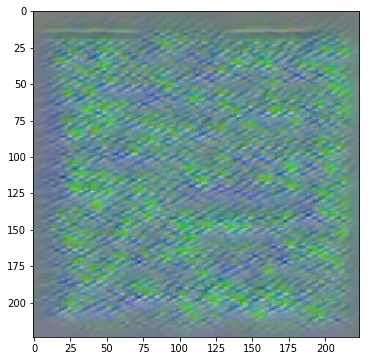

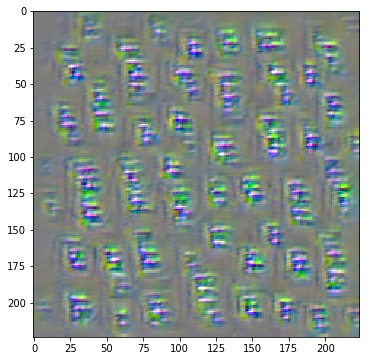

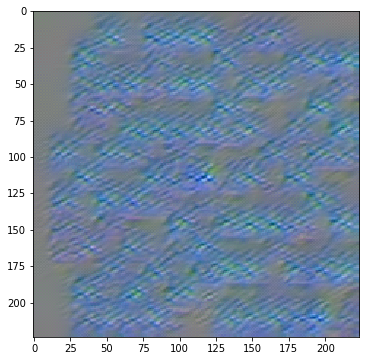

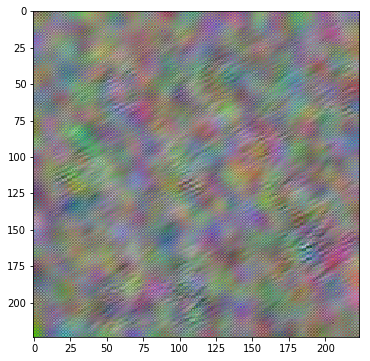

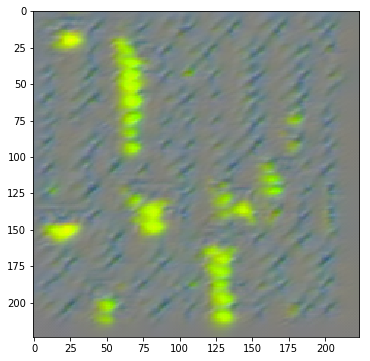

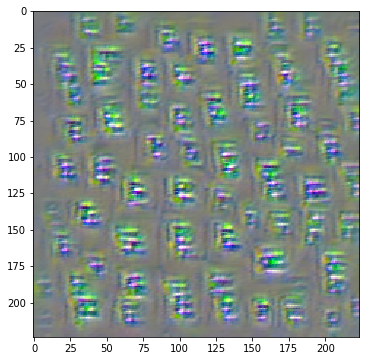

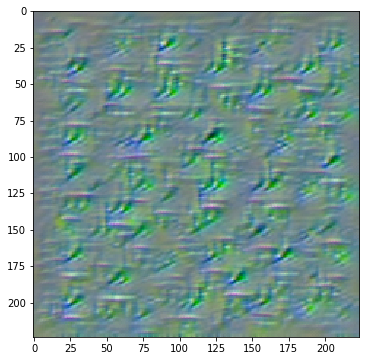

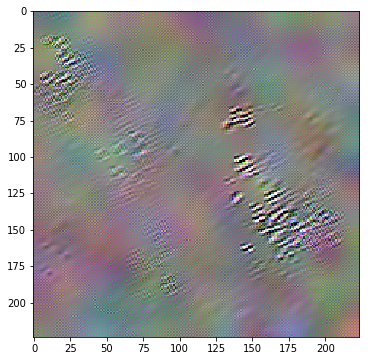

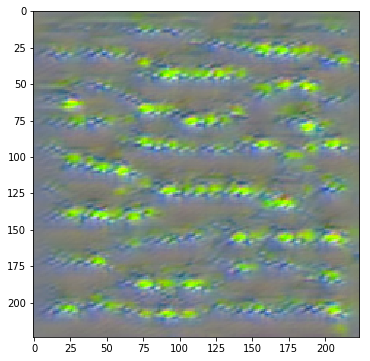

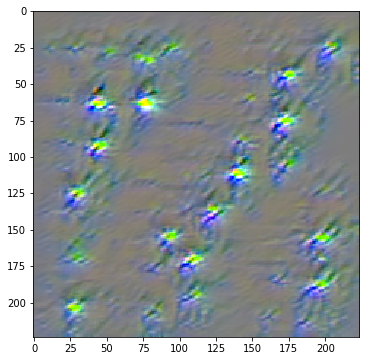

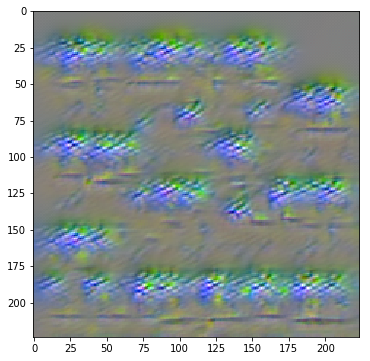

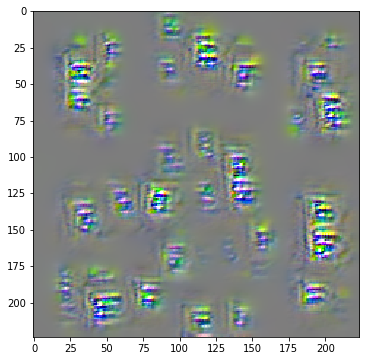

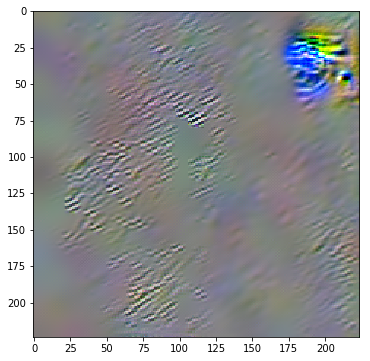

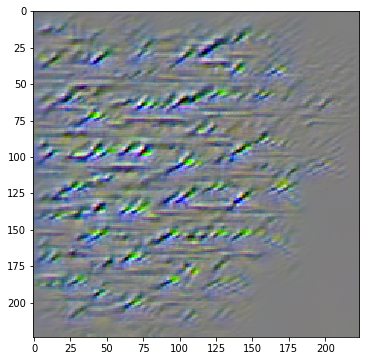

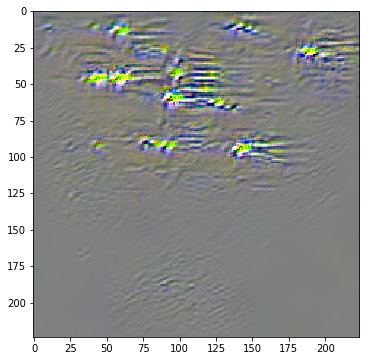

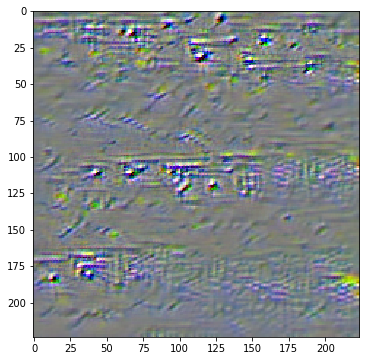

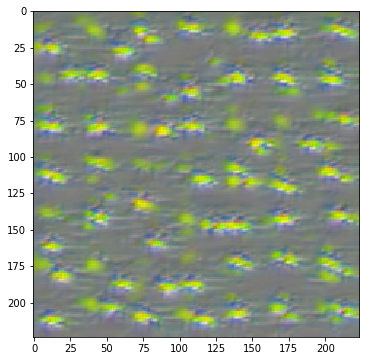

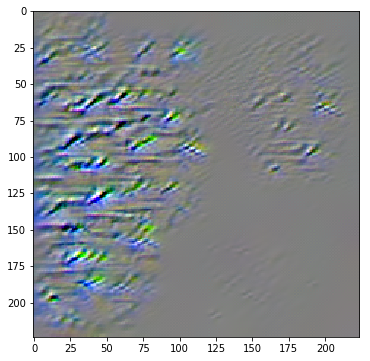

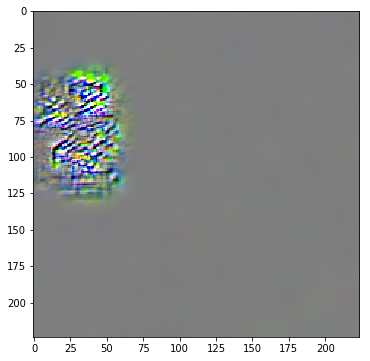

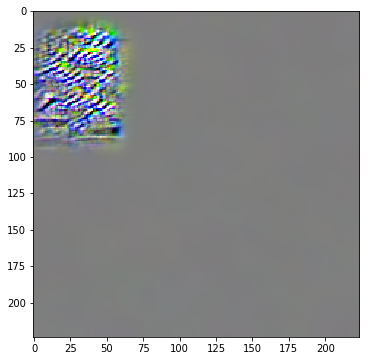

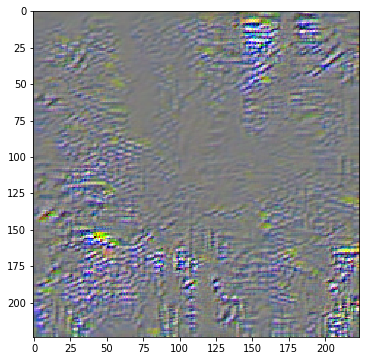

In [80]:
from src.vis.visualization import visualize_activation
for y in range(34):
    print(y)
    img = visualize_activation(model, y, filter_indices=1)
    plt.figure(y+1)
    plt.imshow(img)
    